In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('bike_hour.csv')
data = data.drop(['dteday', 'instant', 'casual', 'registered'],axis=1)
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 1.7 MB


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


<AxesSubplot:xlabel='hum', ylabel='cnt'>

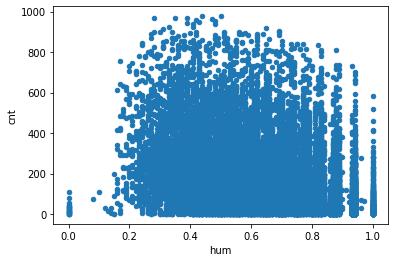

In [8]:
data.plot.scatter(x= 'hum', y = 'cnt')

In [7]:
# 查看各个因素与用车里量的关系
data.pivot_table(index='weekday', values='cnt')
# data.pivot_table(index='yr', values='cnt')

,cnt
yr,
0,143.794448
1,234.666361


# 训练模型

In [11]:
import sklearn.preprocessing as sp
import sklearn.pipeline as pl
import sklearn.metrics as sm
import sklearn.model_selection as ms
data.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [18]:
x, y = data.loc[:,:'windspeed'], data['cnt']
train_x, test_x, train_y, test_y = ms.train_test_split(x, y, test_size=0.1, random_state=7)
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((15641, 12), (15641,), (1738, 12), (1738,))

In [23]:
import sklearn.linear_model as lm

model = lm.Ridge()
model.fit(train_x, train_y)
pred_train_y = model.predict(train_x)
pred_test_y = model.predict(test_x)

print("Train_x r2 Score:", sm.r2_score(train_y, pred_train_y))
print("Train_x r2 Score:", sm.r2_score(test_y, pred_test_y))
print("MSE:", sm.mean_absolute_error(test_y, pred_test_y))

Train_x r2 Score: 0.39036848731914453
Train_x r2 Score: 0.3747034849730343
MSE: 106.24943797677085


In [26]:
#多项式回归
import sklearn.pipeline as pl
import sklearn.preprocessing as sp

model = pl.make_pipeline(sp.PolynomialFeatures(4), lm.Ridge())
model.fit(train_x, train_y)
pred_train_y = model.predict(train_x)
pred_test_y = model.predict(test_x)
print('Training r2:', sm.r2_score(train_y, pred_train_y))
print('Testing r2:', sm.r2_score(test_y, pred_test_y))

Training r2: 0.700329825923804
Testing r2: 0.6647218747025834


In [32]:
# 决策树回归
import sklearn.metrics as sm
import sklearn.tree as st

# 如果出现了过拟合情况：
# 把max_depth调低一点、把min_samples_split调高一点
model = st.DecisionTreeRegressor(
        max_depth=11, min_samples_split=10)
model.fit(train_x, train_y)
# 评估
pred_train_y = model.predict(train_x)
pred_test_y = model.predict(test_x)
print('Training r2:', sm.r2_score(train_y, pred_train_y))
print('Testing r2:', sm.r2_score(test_y, pred_test_y))
print('Testing MAE:', sm.mean_absolute_error(test_y, pred_test_y))

Training r2: 0.9433016342841107
Testing r2: 0.8979422538218156
Testing MAE: 33.51812040852807


In [33]:
# 正向激励
arn.ensemble as se
import sklearn.tree as st

model = st.DecisionTreeRegressor(max_depth=10)
model = se.AdaBoostRegressor(
            model, n_estimators=200, random_state=7)
model.fit(train_x, train_y)
pred_train_y = model.predict(train_x)
pred_test_y = model.predict(test_x)
print('Training r2:', sm.r2_score(train_y, pred_train_y))
print('Testing r2:', sm.r2_score(test_y, pred_test_y))

Training r2: 0.9779171288515615
Testing r2: 0.9334248765814364


In [34]:
# GBDT
model = se.GradientBoostingRegressor(
    max_depth=4, n_estimators=500, min_samples_split=3)
model.fit(train_x, train_y)
pred_train_y = model.predict(train_x)
pred_test_y = model.predict(test_x)
print('Training r2:', sm.r2_score(train_y, pred_train_y))
print('Testing r2:', sm.r2_score(test_y, pred_test_y))
print('Testing MAE:', sm.mean_absolute_error(test_y, pred_test_y))

Training r2: 0.9540009169902134
Testing r2: 0.9393099883949094
Testing MAE: 28.611142748958873


In [35]:
# 随机森林
model = se.RandomForestRegressor(
    max_depth=10, n_estimators=200, min_samples_split=10)
model.fit(train_x, train_y)
pred_train_y = model.predict(train_x)
pred_test_y = model.predict(test_x)
print('Training r2:', sm.r2_score(train_y, pred_train_y))
print('Testing r2:', sm.r2_score(test_y, pred_test_y))
print('Testing MAE:', sm.mean_absolute_error(test_y, pred_test_y))

Training r2: 0.9384593210973067
Testing r2: 0.9167141725555699
Testing MAE: 32.23397917707637
